In [1]:
# Оригинал https://russianblogs.com/article/2953745632/
import numpy as np
import random
from PIL import Image
import os
import re
import matplotlib.pyplot as plt



In [4]:
def readImg2array(file,size, threshold= 145):
    #file is jpg or jpeg pictures
    #size is a 1*2 vector,eg (40,40)
    pilIN = Image.open(file).convert(mode="L")
    pilIN= pilIN.resize(size)
    #pilIN.thumbnail(size,Image.ANTIALIAS)
    imgArray = np.asarray(pilIN,dtype=np.uint8)
    x = np.zeros(imgArray.shape,dtype=np.float)
    x[imgArray > threshold] = 1
    x[x==0] = -1
    return x

In [3]:
def array2img(data, outFile = None):

    #data is 1 or -1 matrix
    y = np.zeros(data.shape,dtype=np.uint8)
    y[data==1] = 255
    y[data==-1] = 0
    img = Image.fromarray(y,mode="L")
    if outFile is not None:
        img.save(outFile)
    return img



In [6]:
def mat2vec(x):
    #x is a matrix
    m = x.shape[0]*x.shape[1]
    tmp1 = np.zeros(m)

    c = 0
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            tmp1[c] = x[i,j]
            c +=1
    return tmp1


In [7]:
#use Hebbian rule create weight matrix
def create_W_single_pattern(x):
    # x is a vector
    if len(x.shape) != 1:
        print ("The input is not vector")
        return
    else:
        w = np.zeros([len(x),len(x)])
        for i in range(len(x)):
            for j in range(i,len(x)):
                if i == j:
                    w[i,j] = 0
                else:
                    w[i,j] = x[i]*x[j]
                    w[j,i] = w[i,j]
    return w

In [10]:
#randomly update
def update_asynch(weight,vector,theta=0.5,times=100):
    energy_ = []
    times_ = []
    energy_.append(energy(weight,vector))
    times_.append(0)
    for i in range(times):
        length = len(vector)
        update_num = random.randint(0,length-1)
        next_time_value = np.dot(weight[update_num][:],vector) - theta
        if next_time_value>=0:
            vector[update_num] = 1
        if next_time_value<0:
            vector[update_num] = -1
        times_.append(i)
        energy_.append(energy(weight,vector))
    
    return (vector,times_,energy_)             


In [11]:
def energy(weight,x,bias=0):
#weight: m*m weight matrix
#x: 1*m data vector
#bias: outer field
    energy = -x.dot(weight).dot(x.T)+sum(bias*x)
    # E is a scalar
    return energy


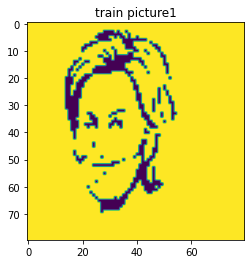

weight matrix is prepared!!!!!


In [21]:
#main 
#import training picture
size_global =(80,80)
threshold_global = 60

train_paths = []
train_path = "pictures/"
# for i in os.listdir(train_path):
#     if re.match(r'[0-9 a-z A-Z-_]*.jp[e]*g',i):
#         train_paths.append(train_path+i)
train_paths.append(train_path+"1.png")
flag = 0
w_ = 0
for path in train_paths:
    matrix_train = readImg2array(path,size = size_global,threshold=threshold_global)
    vector_train = mat2vec(matrix_train)
    plt.imshow(array2img(matrix_train))
    plt.title("train picture"+str(flag+1))
    plt.show()
    if flag == 0:
        w_ = create_W_single_pattern(vector_train)
        flag = flag +1
    else:
        w_ = w_ +create_W_single_pattern(vector_train)
        flag = flag +1

w_ = w_/flag
print("weight matrix is prepared!!!!!")
    

    


In [22]:
## import test data
test_paths = []
test_paths.append(train_path+"1.png")
# for i in os.listdir(test_path):
#     if re.match(r'[0-9 a-z A-Z-_]*.jp[e]*g',i):
#         test_paths.append(test_path+i)
num = 0
for path in test_paths:
    num = num+1
    matrix_test = readImg2array(path,size = size_global,threshold=threshold_global)
    vector_test = mat2vec(matrix_test)
    plt.subplot(221)
    plt.imshow(array2img(matrix_test))
    plt.title("test picture"+str(num))


FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: '/Users/lichan/Desktop/hopfield/test_pics/'